In [1]:
import Merge_Cartesian as MC
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib widget

# Parameter Sweeps
---

## Comparing Input Variables

In [2]:
plt.rcParams["figure.figsize"] = (14, 7)

L_Time = '5'
C_Time = '7'

L_impedance = '100'
C_impedance = '1'

L_Time_2 = '1'
C_Time_2 = '10'

L_impedance_2 = '100'
C_impedance_2 = '1'

number_periods = '1'

                 #  IMPEDANCE     ,TIME    ,LENGTH
Inductor_List =    [L_impedance   ,L_Time  ,'1']
Capacitor_List =   [C_impedance   ,C_Time  ,'1']
Inductor_List_2 =  [L_impedance_2 ,L_Time_2,'1']
Capacitor_List_2 = [C_impedance_2 ,C_Time_2,'1']

              #   VOLTAGE  , PERIODS       , BUCK , LOAD
Circuit_List =   ['1'      , number_periods, False, '12']
Circuit_List_2 = ['1'      , number_periods, False, '12']

(data_input,
data_output,
data_output_merged, 
data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List)

(data_input_2,
data_output_2,
data_output_merged_2, 
data_output_ordered_2) = MC.Full_Cycle(Inductor_List_2,Capacitor_List_2, Circuit_List_2)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        250.0
Inductor Capacitance Per Length :       0.025
Inductor Length :                       1
Inductor Total Inductance :             250.0
Inductor Total Capacitance :            0.025
Inductor Velocity :                     0.4
Inductor Time Delay :                   2.5
Inductor Impedance :                    100

- The Capacitor -
Capacitor Inductance Per Length :       3.5
Capacitor Capacitance Per Length :      3.5
Capacitor Length :                      1
Capacitor Total Inductance :            3.5
Capacitor Total Capacitance :           3.5
Capacitor Velocity :                    0.2857142857142857142857142857
Capacitor Time Delay :                  3.5
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  185.8591278463807439847922729
Number of Wavefronts :                  3120
Number of Layers :     

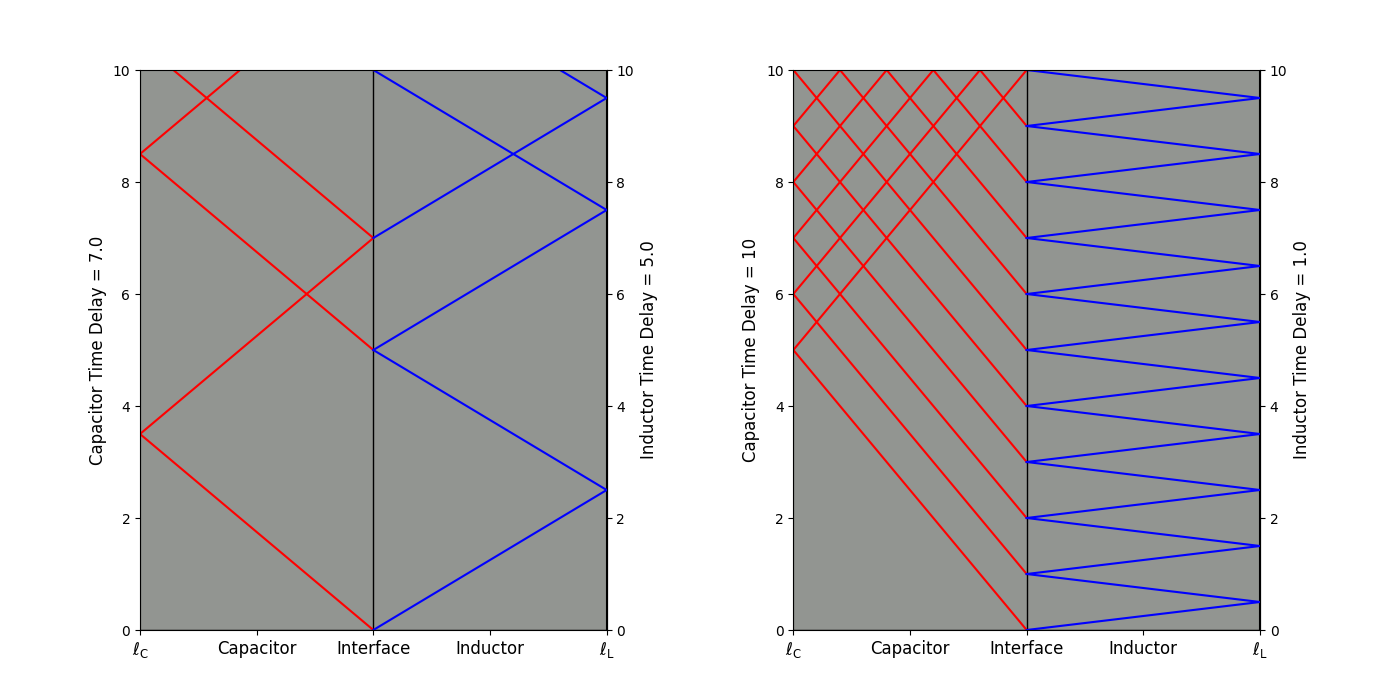

In [3]:
fig_reflection, ax_reflection = plt.subplots(1,2)

MC.plot_refelction_diagram(data_input,data_output_ordered,10,ax_reflection[0],False)
MC.plot_refelction_diagram(data_input_2,data_output_ordered_2,10,ax_reflection[1],False)

ax_reflection[0].set_title('')
ax_reflection[1].set_title('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

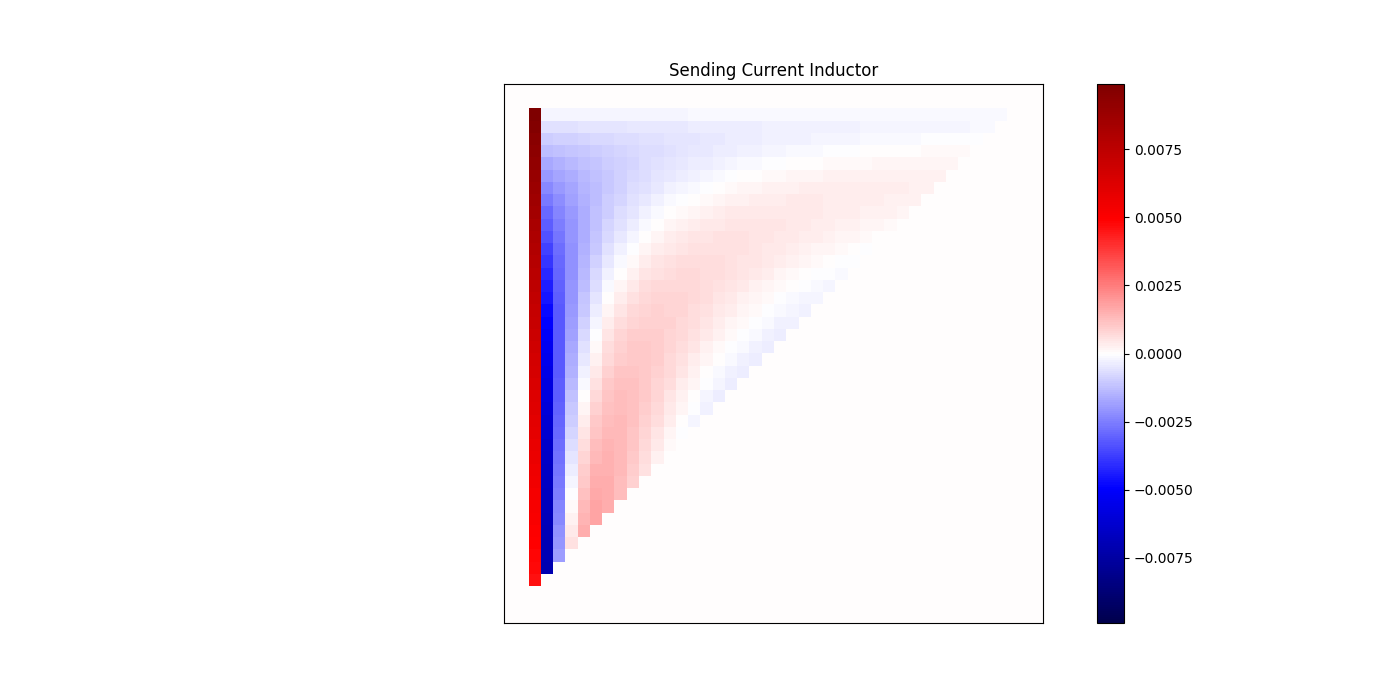

In [4]:
fig_one, ax_one = plt.subplots()

ax_one.get_xaxis().set_ticks([])
ax_one.get_yaxis().set_ticks([])

MC.plot_fanout_seismic(data_output.get_sending("current inductor"),ax_one,"Sending Current Inductor",True,False,2)

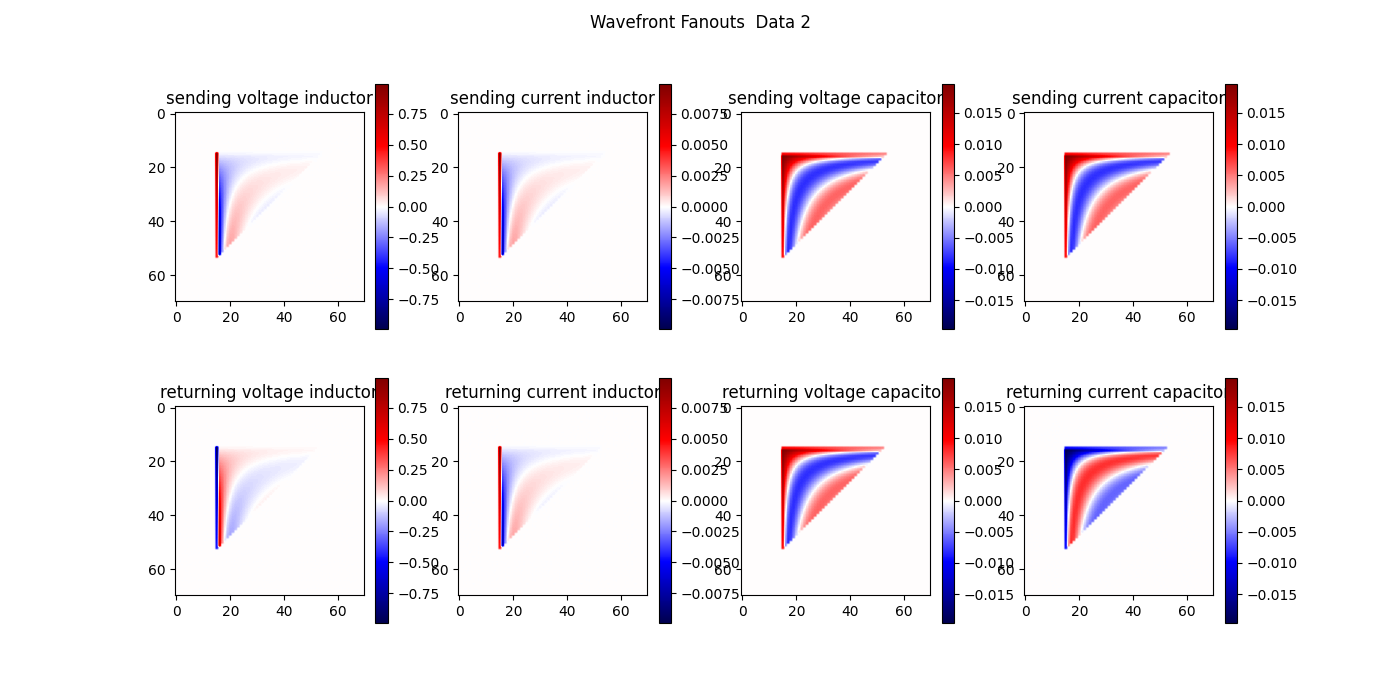

In [5]:
fig_comp_sending, ax_comp_sending = MC.plot_fanout_wavefronts_all(data_output,True, " Data 2")

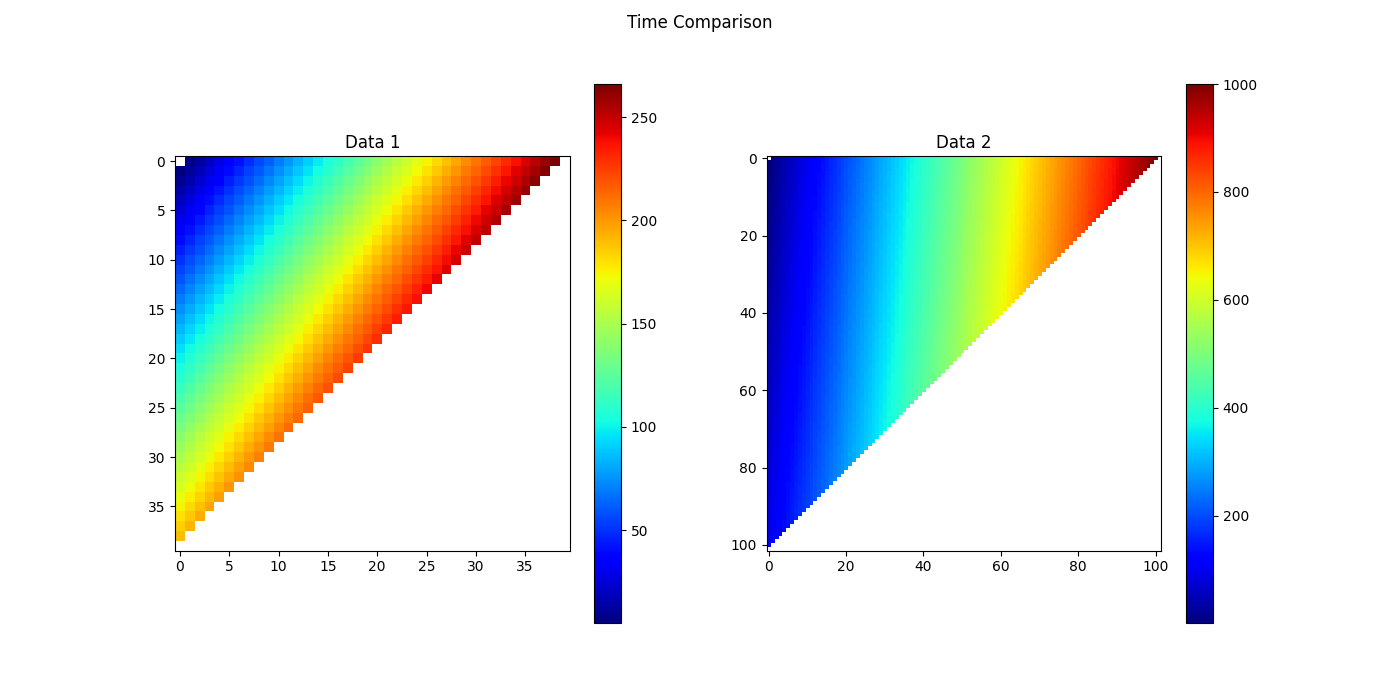

In [6]:
fig_time, ax_time = plt.subplots(1,2)

fig_time.suptitle("Time Comparison")
# np.ma.masked_where(a <= 2, a)
MC.plot_fanout_colour(np.ma.masked_where(data_output.Time == 0 ,data_output.Time),ax_time[0],"Data 1",True,True)
MC.plot_fanout_colour(np.ma.masked_where(data_output_2.Time == 0 ,data_output_2.Time),ax_time[1],"Data 2",True,True)

Text(0.5, 0.98, 'Data 2 Interconncect Fanouts')

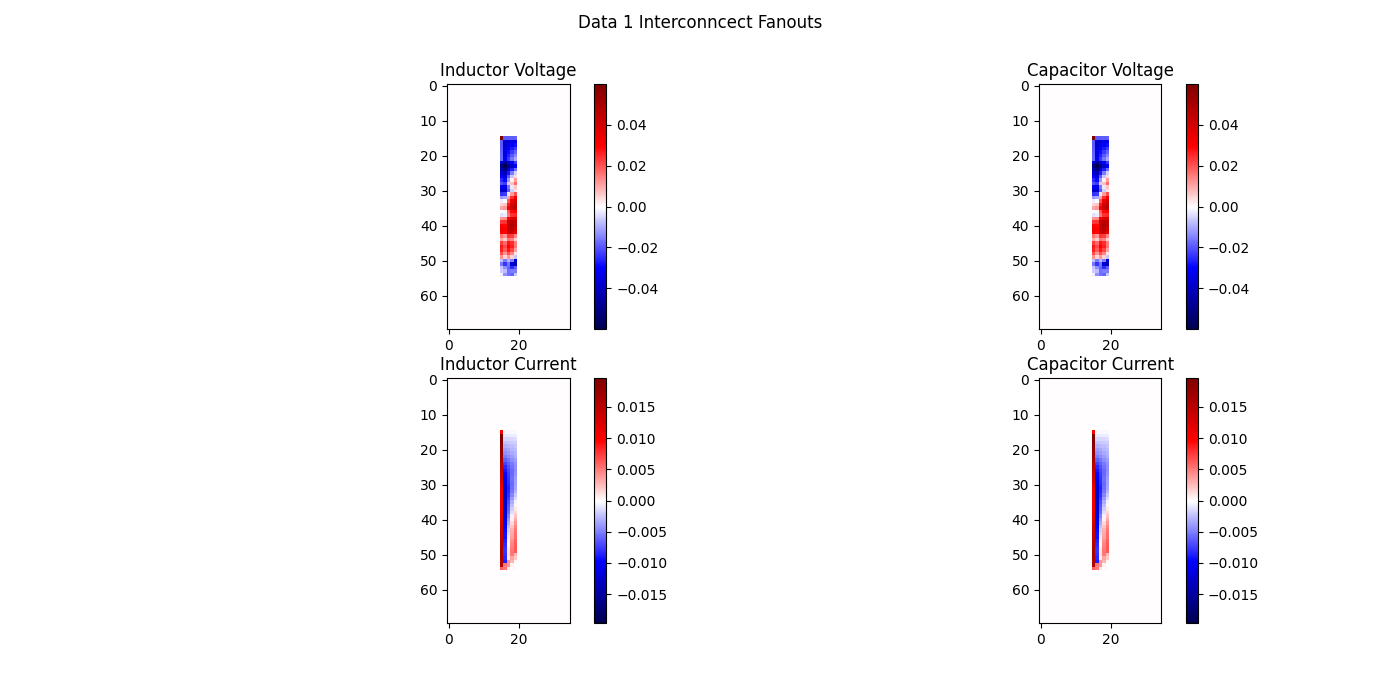

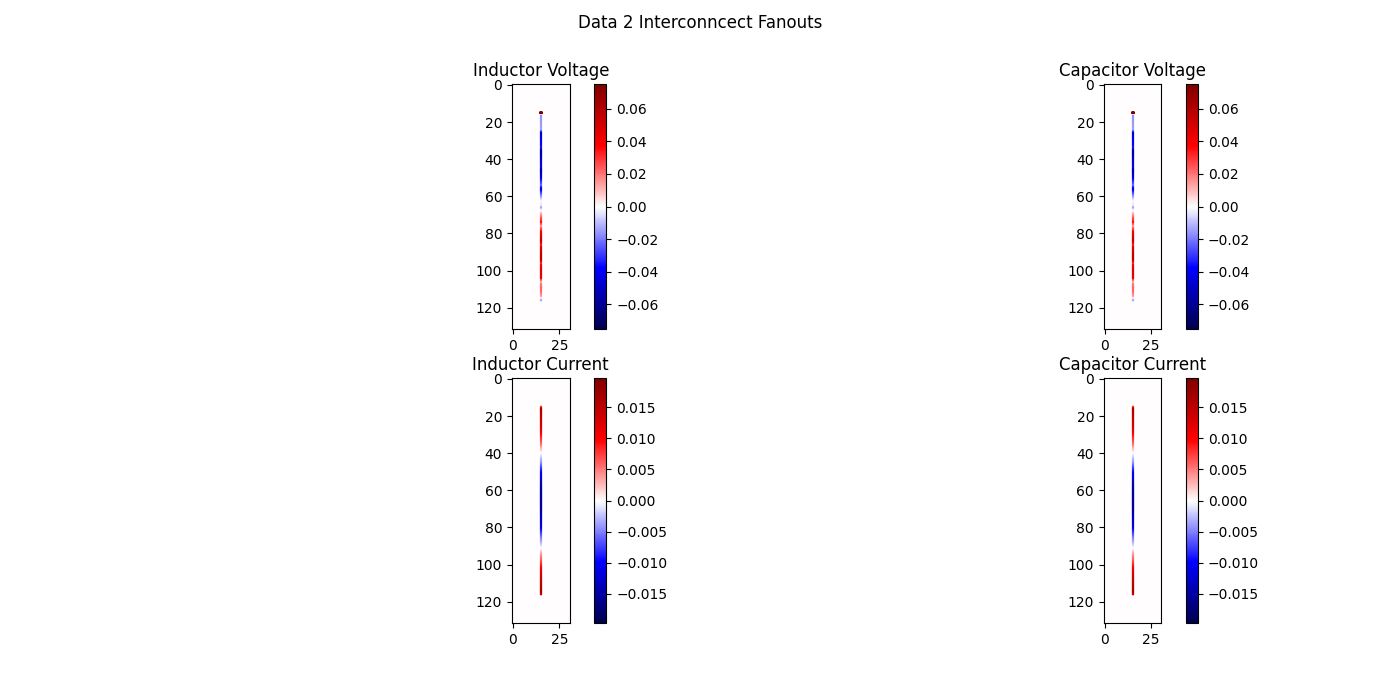

In [7]:
fig_comp, ax_comp = MC.plot_fanout_interconnect_4(data_output_merged)
fig_comp.suptitle("Data 1 Interconncect Fanouts")

fig_comp_2, ax_comp_2 = MC.plot_fanout_interconnect_4(data_output_merged_2)
fig_comp_2.suptitle("Data 2 Interconncect Fanouts")

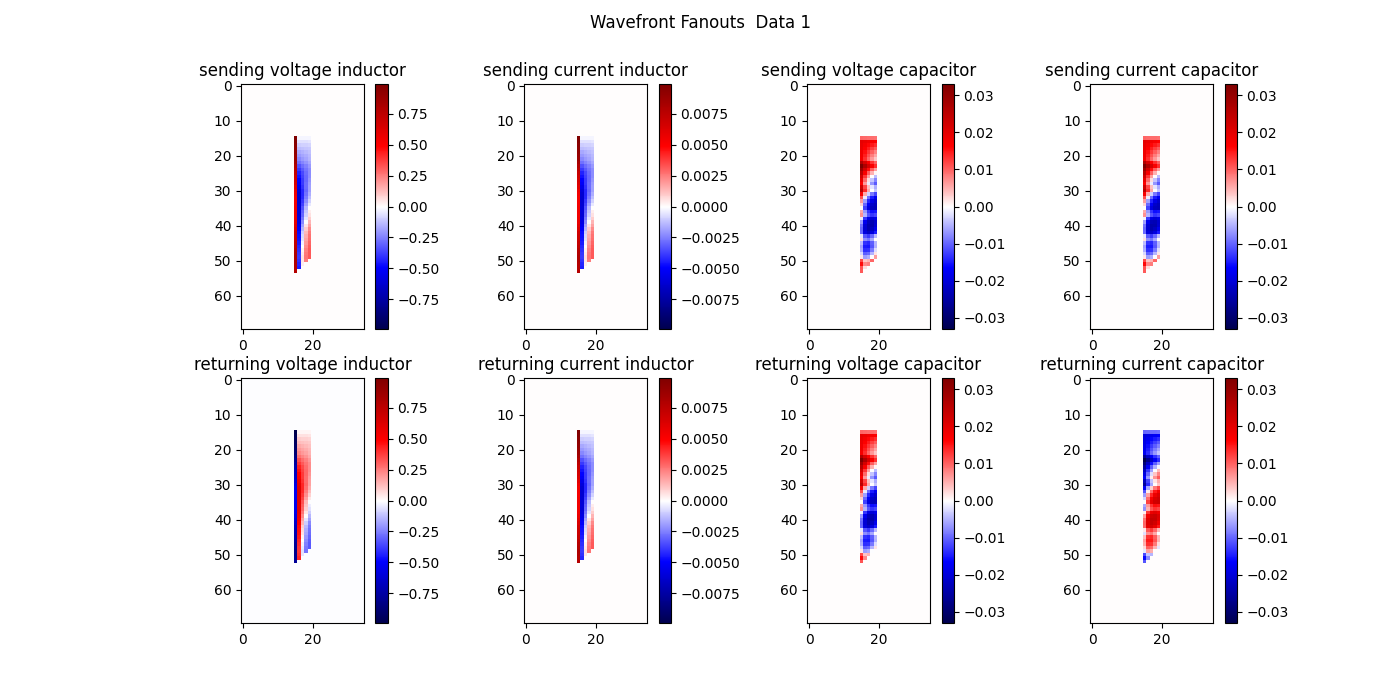

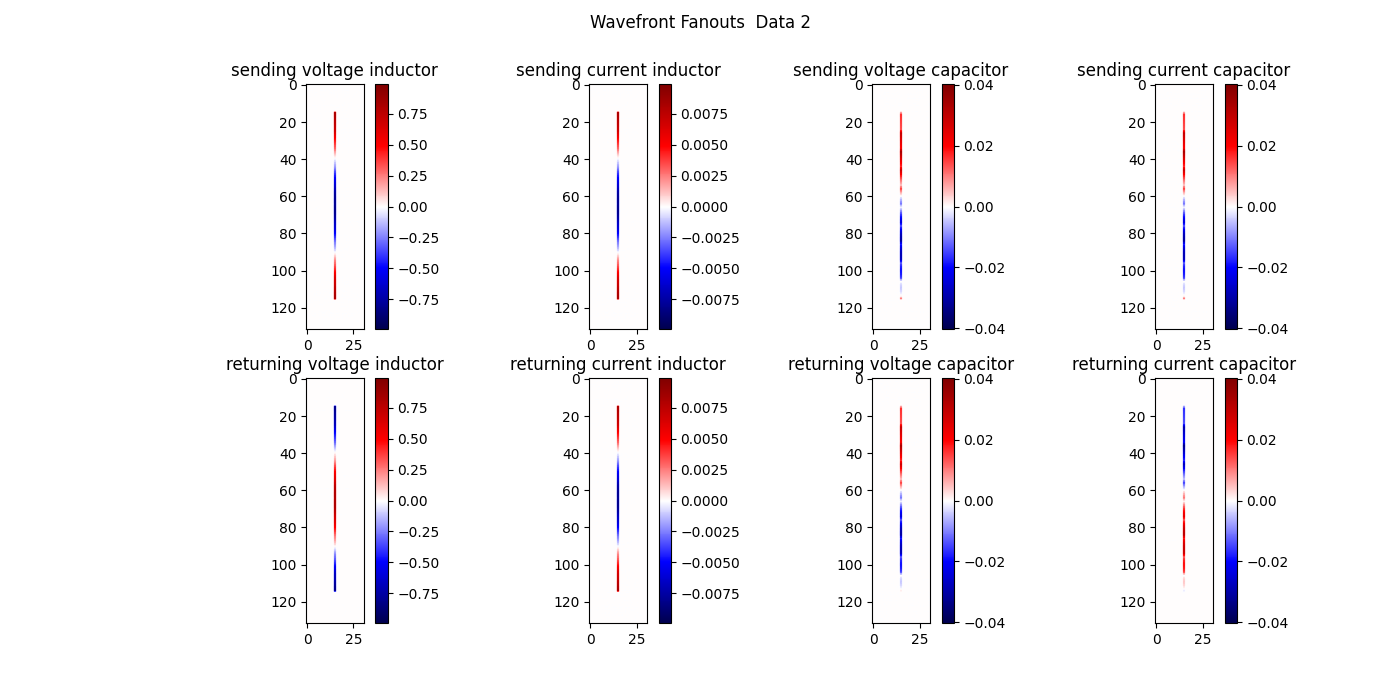

In [8]:
fig_comp_merged_sending, ax_comp_merged_sending = MC.plot_fanout_wavefronts_all(data_output_merged,True, " Data 1")
fig_comp_merged_returning, ax_comp_merged_returning = MC.plot_fanout_wavefronts_all(data_output_merged_2,False, " Data 2")

Text(0.5, 0.98, 'Change in Wavefornts, Data 1 vs Data 2')

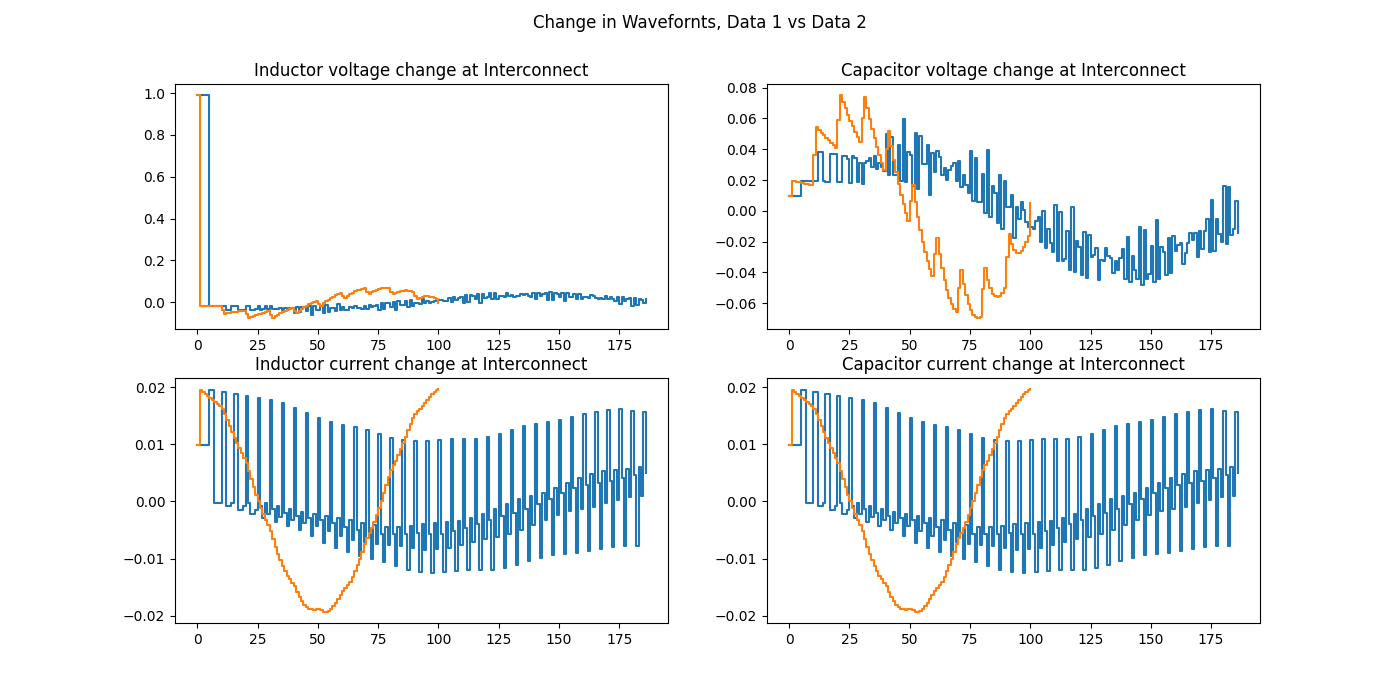

In [9]:
fig_wave, ax_wave = MC.plot_time_interconnect_4_wavefronts_both(data_output_ordered,data_output_ordered_2)
fig_wave.suptitle('Change in Wavefornts, Data 1 vs Data 2')

Text(0.5, 0.98, 'Accumulated change at Interconnect, Data 1 vs Data 2')

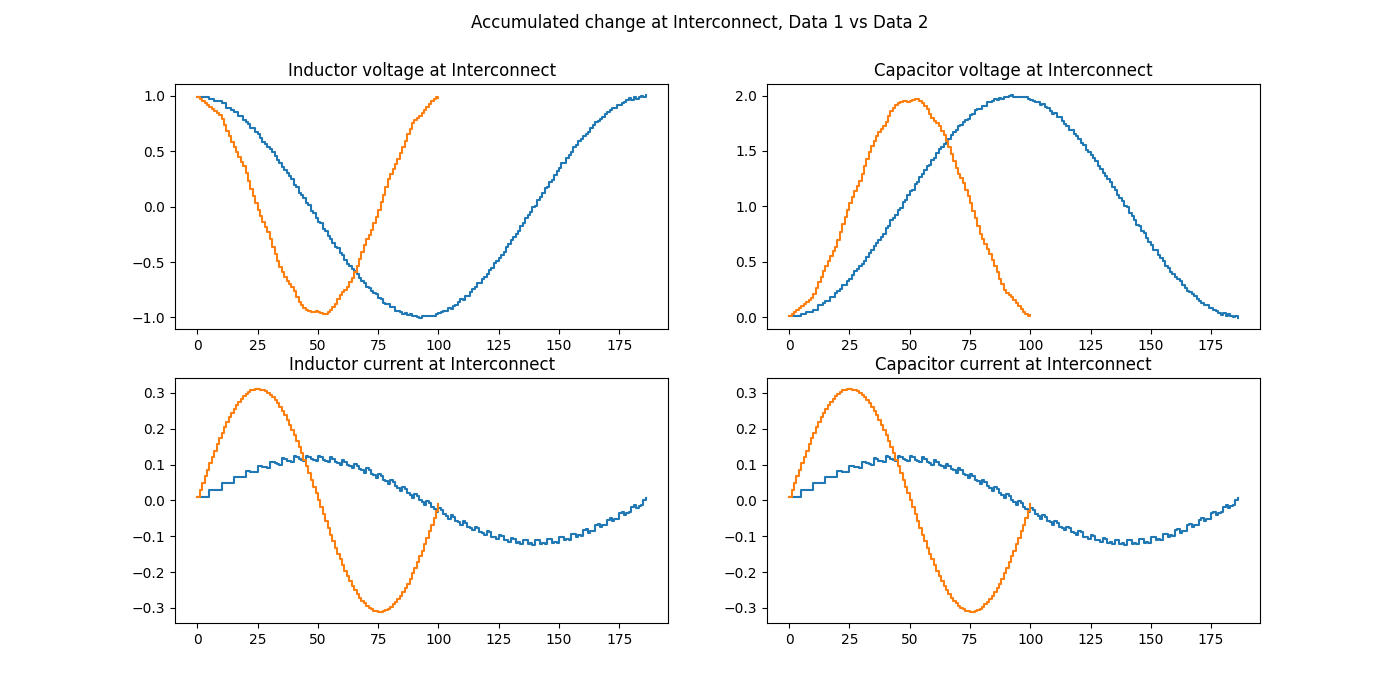

In [10]:
fig_inter, ax_inter = MC.plot_time_interconnect_4_both(data_output_ordered,data_output_ordered_2)
fig_inter.suptitle('Accumulated change at Interconnect, Data 1 vs Data 2')

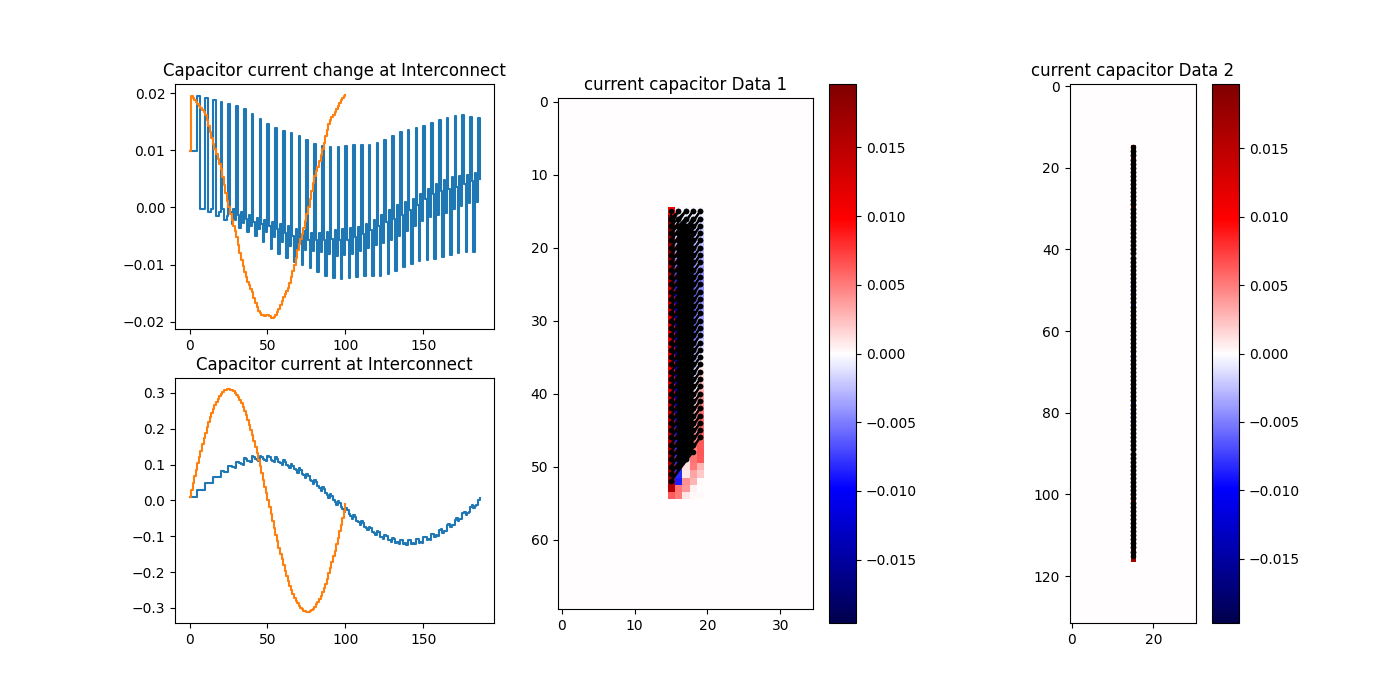

In [11]:
plotting_options = ["voltage inductor", "current inductor", "voltage capacitor", "current capacitor"]

what_to_plot = plotting_options[3]

fig_prog, ax_prog =  MC.plot_time_interconnect_3_both(data_output_merged,data_output_ordered,data_output_merged_2,data_output_ordered_2,what_to_plot)

c:\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


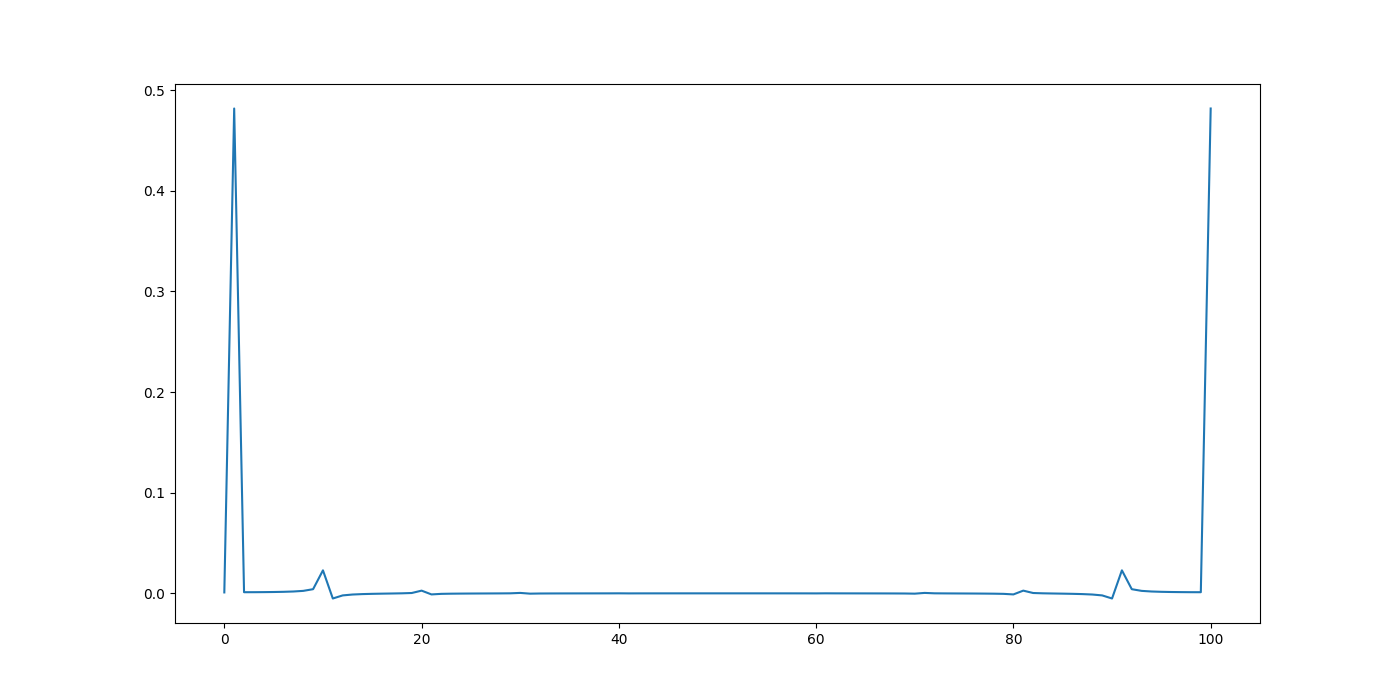

In [12]:
fig_dv, ax_dv = plt.subplots()
# MC.plot_diff(data_output_ordered.Current_Interconnect_Inductor,data_output_ordered.Time,ax_dv)
# MC.plot_diff(data_output_ordered_2.Current_Interconnect_Inductor,data_output_ordered_2.Time,ax_dv)

fourier =  np.fft.fft(np.cumsum(data_output_ordered_2.Current_Interconnect_Inductor))
# freq = np.fft.fftfreq(data_output_ordered.Time,np.)
ax_dv.plot(fourier)

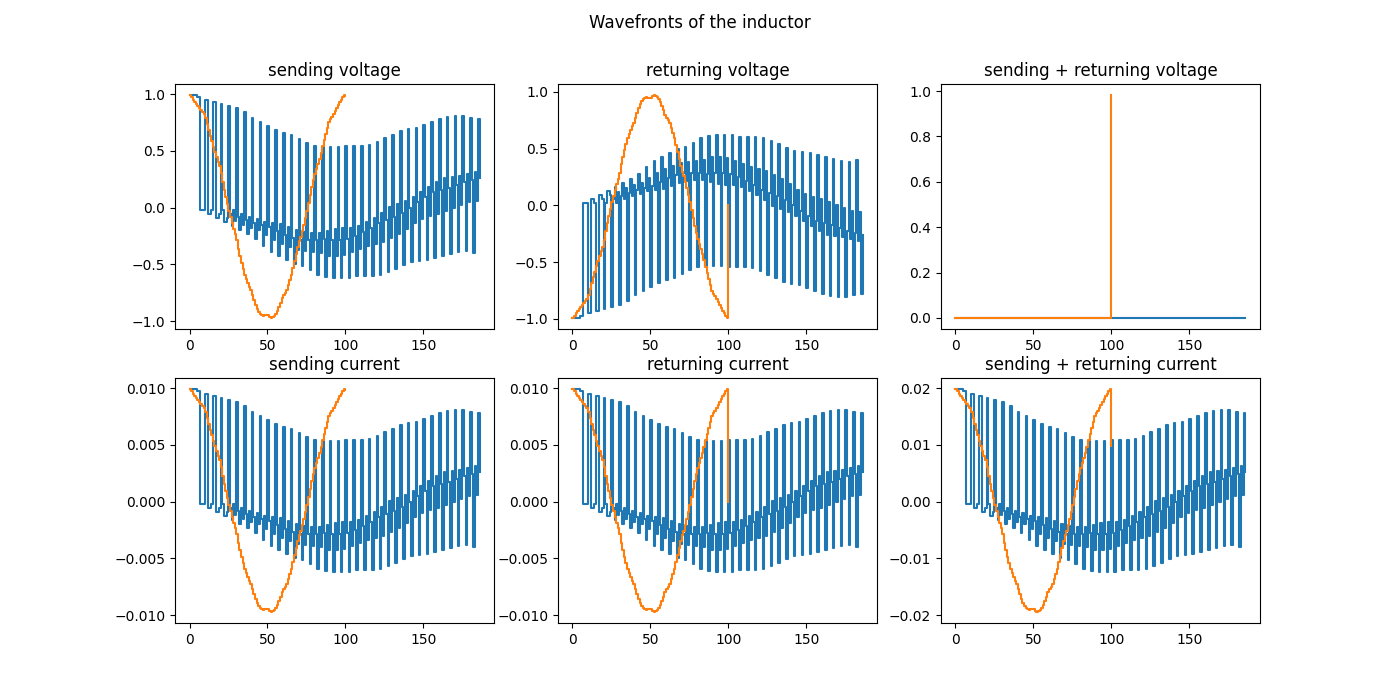

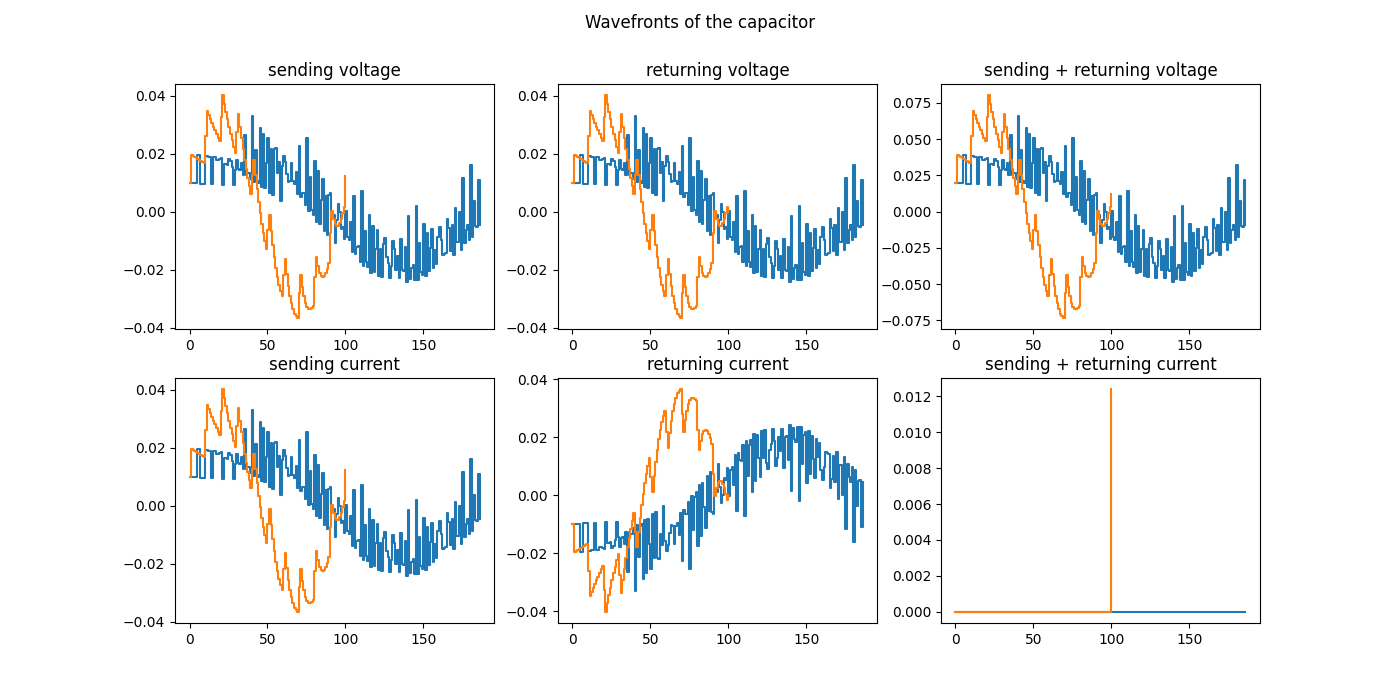

In [13]:
fig_ind_wave, ax_ind_wave = MC.plot_time_wavefronts_all_both(data_output_ordered,data_output_ordered_2,"inductor")

fig_cap_wave, ax_cap_wave = MC.plot_time_wavefronts_all_both(data_output_ordered,data_output_ordered_2,"capacitor")

GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=184.85912784638074)

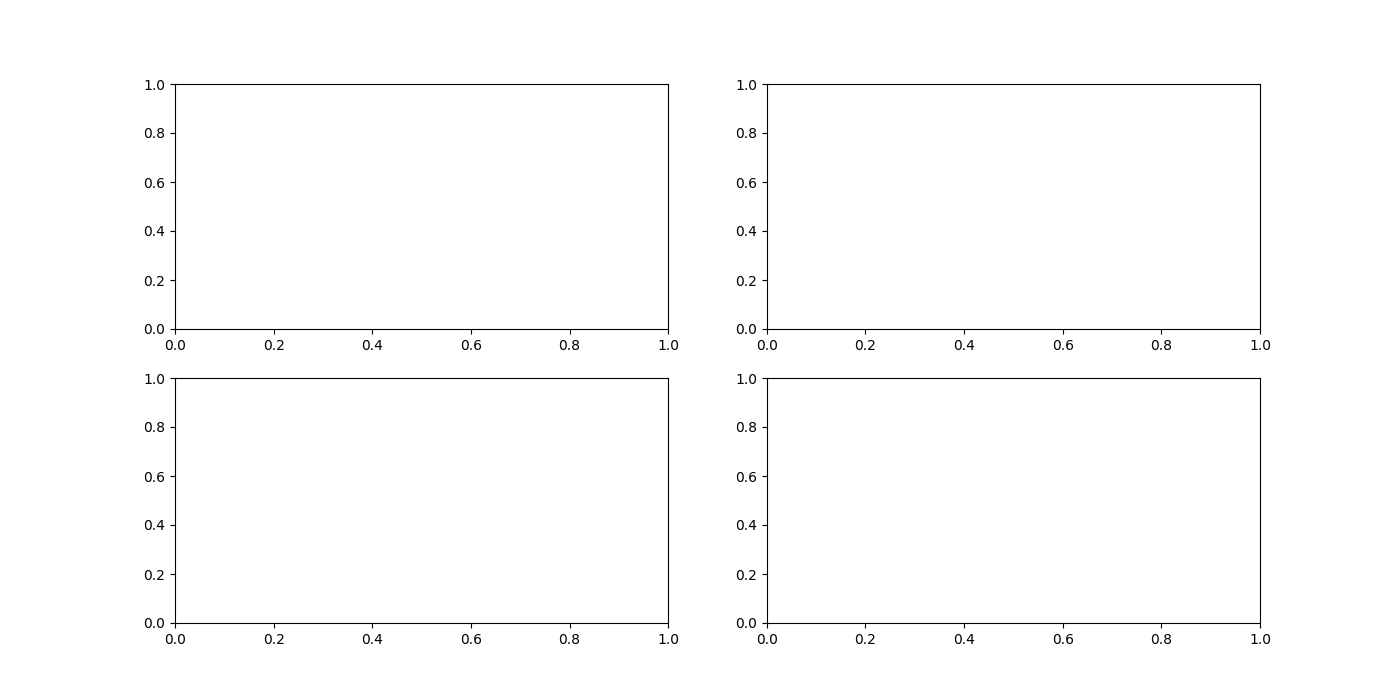

In [14]:
MC.spatial_investigator_ui(data_input, data_output_merged, data_output_ordered)

GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=98.34588265796755)

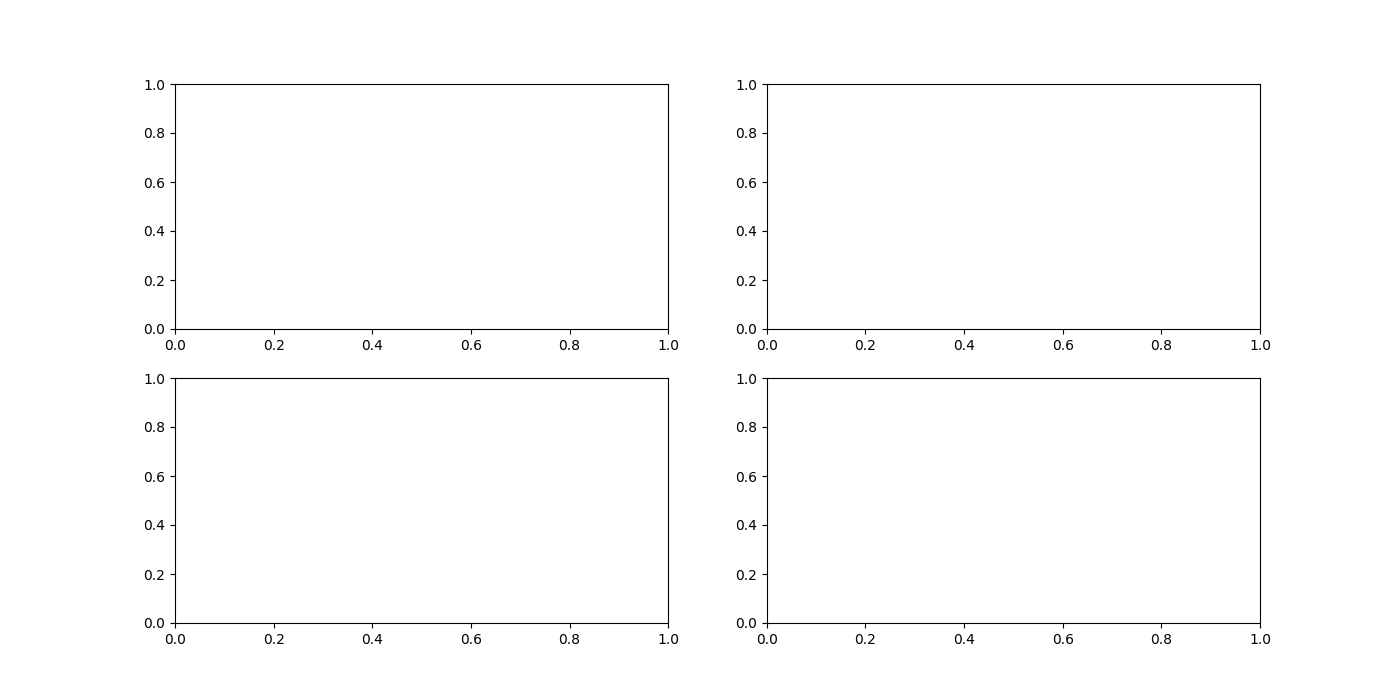

In [15]:
MC.spatial_investigator_ui(data_input_2, data_output_merged_2, data_output_ordered_2)

Label(value='Video Saving Widget!!')

Label(value='Max Simulation time = 185.86')

ToggleButtons(description='fps:', options=('15', '30', '60'), value='15')

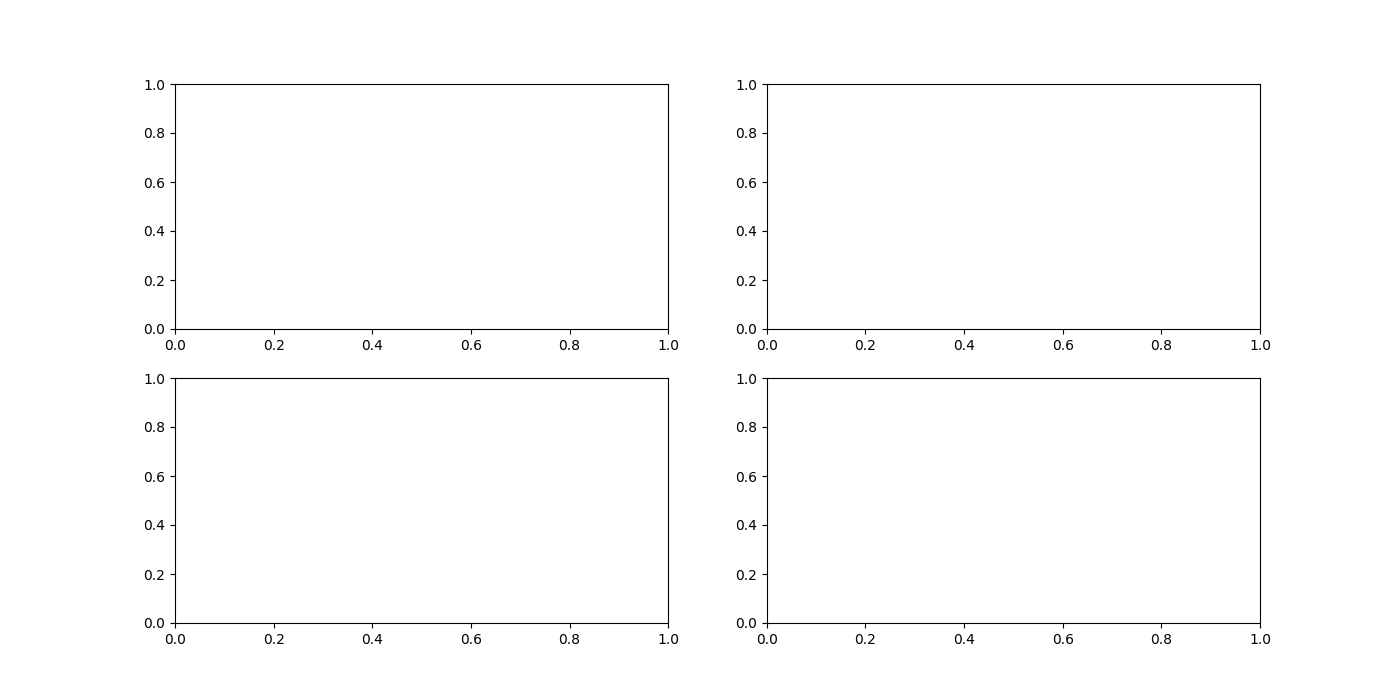

In [16]:
MC.video_save_ui(data_input, data_output_merged, data_output_ordered)